In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sklearn as skl
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
rawData = pdr.DataReader("SI=F", 
                       start='2019-1-1', 
                       end='2019-12-31', 
                       data_source='yahoo')

rawData = rawData.resample("D").ffill() # resample Days and fill values
raw = rawData[['Open']]
rawData

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,15.570000,15.420000,15.520000,15.542000,17.0,15.542000
2019-01-03,15.706000,15.706000,15.706000,15.706000,91.0,15.706000
2019-01-04,15.695000,15.620000,15.690000,15.695000,7.0,15.695000
2019-01-05,15.695000,15.620000,15.690000,15.695000,7.0,15.695000
2019-01-06,15.810000,15.755000,15.800000,15.760000,19380.0,15.760000
...,...,...,...,...,...,...
2019-12-27,17.930000,17.849001,17.930000,17.849001,53.0,17.849001
2019-12-28,17.930000,17.849001,17.930000,17.849001,53.0,17.849001
2019-12-29,17.885000,17.844999,17.860001,17.875000,26013.0,17.875000


Text(0, 0.5, 'Open Price')

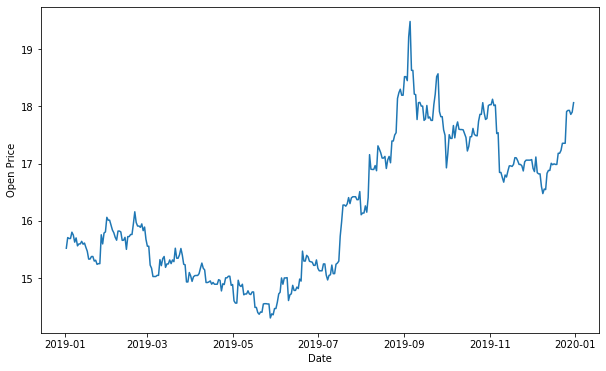

In [3]:
plt.plot(raw)
plt.xlabel("Date")
plt.ylabel("Open Price")

In [4]:

rolmean = raw.rolling(window = int(len(raw) / 12)).mean()

rolstd = raw.rolling(window = int(len(raw) / 12)).std()
print(rolmean, rolstd)

Open
Date                 
2019-01-02        NaN
2019-01-03        NaN
2019-01-04        NaN
2019-01-05        NaN
2019-01-06        NaN
...               ...
2019-12-27  17.027667
2019-12-28  17.056667
2019-12-29  17.083333
2019-12-30  17.111333
2019-12-31  17.144500

[364 rows x 1 columns]                 Open
Date                
2019-01-02       NaN
2019-01-03       NaN
2019-01-04       NaN
2019-01-05       NaN
2019-01-06       NaN
...              ...
2019-12-27  0.332765
2019-12-28  0.371352
2019-12-29  0.399274
2019-12-30  0.426131
2019-12-31  0.460166

[364 rows x 1 columns]


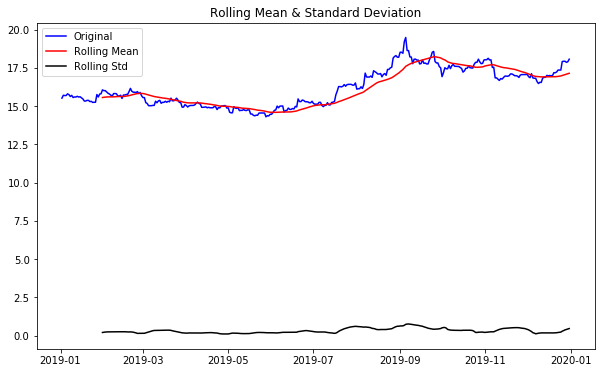

In [5]:
orig = plt.plot(raw, color = 'blue', label = 'Original')
rmean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
rstd = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block = False)

In [6]:
#perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

print('Results of Dicky-Fuller Test')
dftest = adfuller(raw['Open'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P-Value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critial Value (%s)'%key] = value
print(dfoutput)

Results of Dicky-Fuller Test
Test Statistic                  -0.950512
P-Value                          0.770884
#Lags Used                       0.000000
Number of Observations Used    363.000000
Critial Value (1%)              -3.448494
Critial Value (5%)              -2.869535
Critial Value (10%)             -2.571029
dtype: float64


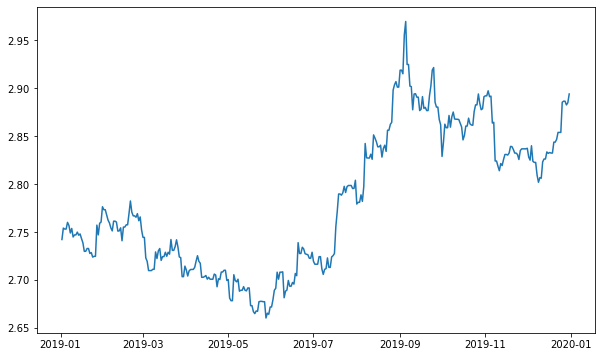

In [7]:
#estimting trend 
raw_logscale = np.log(raw)
plt.plot(raw_logscale)

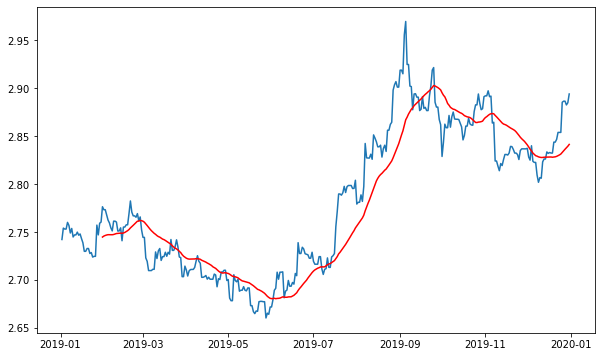

In [8]:
movingAvrg = raw_logscale.rolling(window = int(len(raw) / 12)).mean()

movingStd = raw_logscale.rolling(window = int(len(raw) / 12)).std()
plt.plot(raw_logscale)
plt.plot(movingAvrg, color = "red")

In [9]:
 log_mvAV = raw_logscale - movingAvrg
 log_mvAV.head(12)

 #remove nan values
 log_mvAV.dropna(inplace = True)
 log_mvAV.head(10)

,Open
Date,
2019-01-31,0.031649
2019-02-01,0.027494
2019-02-02,0.026855
2019-02-03,0.020733
2019-02-04,0.015195
2019-02-05,0.012244
2019-02-06,0.007249
2019-02-07,0.003989
2019-02-08,0.013900


In [10]:
# lets create a function that will always make a check on statonary nature of the data
def test_stationary(timeseries):

    #determine rolling statistics
    movingAvrg = timeseries.rolling(window = int(len(timeseries) / 12)).mean()
    movingStd = timeseries.rolling(window = int(len(timeseries) / 12)).std()

    #Plot the data
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    rmean = plt.plot(timeseries, color = 'red', label = 'Rolling Mean')
    rstd = plt.plot(timeseries, color = 'yellow', label = 'Rolling Std')
    plt.legend(loc = "best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block = False)

    #perform Dickey-Fuller test
    print('Results of Dicky-Fuller Test')
    dftest = adfuller(timeseries['Open'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P-Value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critial Value (%s)'%key] = value
    print(dfoutput)

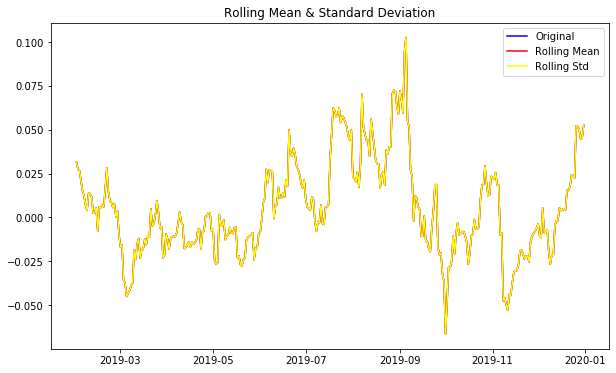

Results of Dicky-Fuller Test
Test Statistic                  -3.229243
P-Value                          0.018353
#Lags Used                       0.000000
Number of Observations Used    334.000000
Critial Value (1%)              -3.450081
Critial Value (5%)              -2.870233
Critial Value (10%)             -2.571401
dtype: float64


In [11]:
test_stationary(log_mvAV)

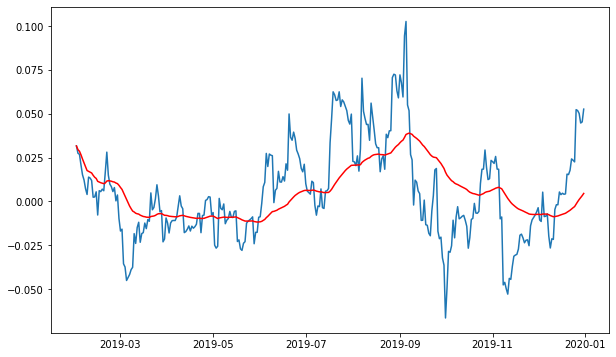

In [12]:
expDecayWeightedAverage= log_mvAV.ewm( halflife = int(len(log_mvAV) / 12), min_periods = 0, adjust = True).mean()
plt.plot(log_mvAV)
plt.plot(expDecayWeightedAverage, color = "red")

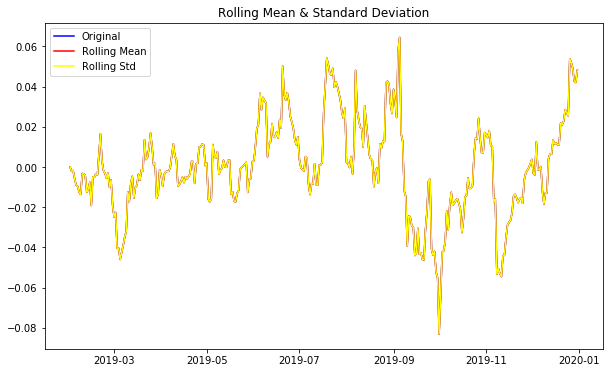

Results of Dicky-Fuller Test
Test Statistic                  -3.606915
P-Value                          0.005630
#Lags Used                       0.000000
Number of Observations Used    334.000000
Critial Value (1%)              -3.450081
Critial Value (5%)              -2.870233
Critial Value (10%)             -2.571401
dtype: float64


In [13]:
#edwa = expDecayWeightedAverage
log_edwa = log_mvAV - expDecayWeightedAverage
test_stationary(log_edwa)

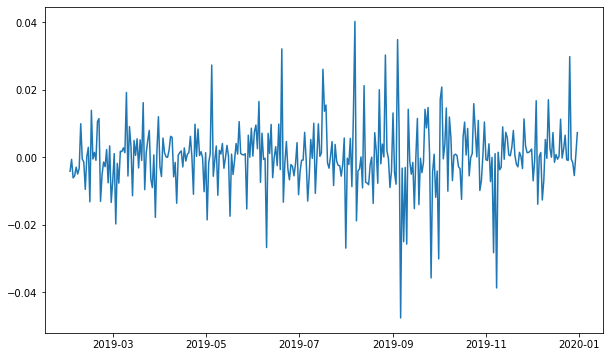

In [14]:
datasetLogDiffShifting = log_mvAV - log_mvAV.shift()
plt.plot(datasetLogDiffShifting)

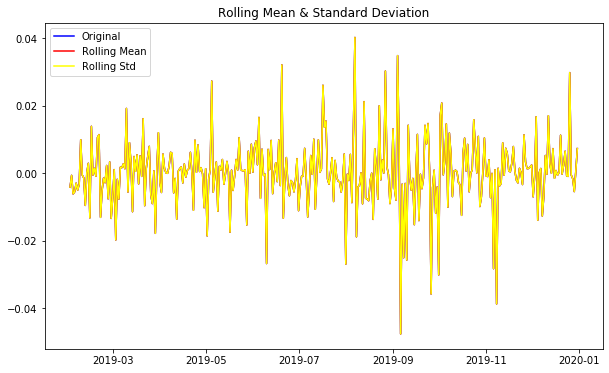

Results of Dicky-Fuller Test
Test Statistic                 -19.760387
P-Value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    333.000000
Critial Value (1%)              -3.450141
Critial Value (5%)              -2.870259
Critial Value (10%)             -2.571415
dtype: float64


In [15]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationary(datasetLogDiffShifting)

In [16]:
log_withfreq = log_mvAV.asfreq('d')
# log_withfreq.dropna(inplace = True)
for index, row in log_withfreq.iterrows():
    print(log_withfreq.loc[[index + pd.Timedelta(days = 1)]])
log_withfreq.dropna()

      Open
Date                
2019-02-15  0.006158
                Open
Date                
2019-02-16  0.005611
                Open
Date                
2019-02-17  0.007039
                Open
Date                
2019-02-18  0.006117
                Open
Date                
2019-02-19  0.016695
                Open
Date                
2019-02-20  0.028124
                Open
Date                
2019-02-21  0.015043
                Open
Date                
2019-02-22  0.009876
                Open
Date                
2019-02-23  0.008442
                Open
Date                
2019-02-24  0.005635
               Open
Date               
2019-02-25  0.00792
               Open
Date               
2019-02-26  0.00034
                Open
Date                
2019-02-27  0.003688
              Open
Date              
2019-02-28 -0.0097
                Open
Date                
2019-03-01 -0.016853
                Open
Date                
2019-03-02 -0.015788
              

KeyError: "None of [DatetimeIndex(['2020-01-01'], dtype='datetime64[ns]', name='Date', freq=None)] are in the [index]"

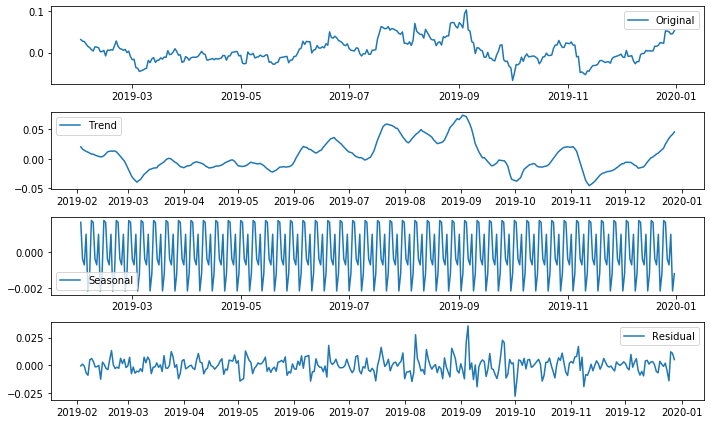

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(log_mvAV)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_mvAV, label = "Original")
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = "Seasonal")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = "Residual")
plt.legend(loc = 'best')
plt.tight_layout()



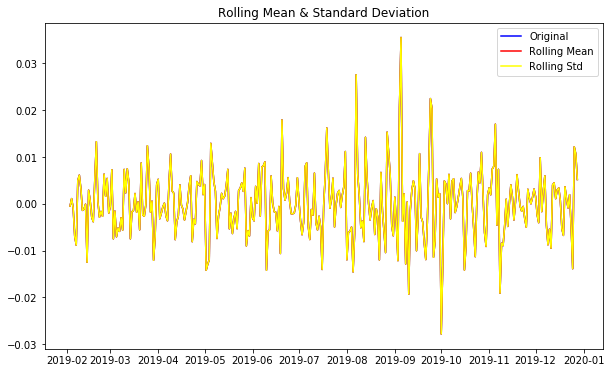

Results of Dicky-Fuller Test


KeyError: 'Open'

In [18]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationary(decomposedLogData)

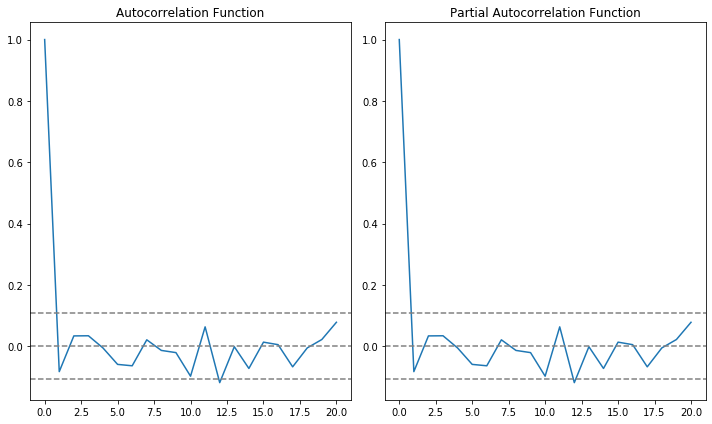

In [19]:
from statsmodels.tsa.stattools import acf , pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = "--", color = 'gray')
plt.axhline(y= -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = "--", color = 'gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = "--", color = 'gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = "--", color = 'gray')
plt.axhline(y= -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = "--", color = 'gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = "--", color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [20]:
datasetLogDiffShifting

,Open
Date,
2019-02-01,-0.004154
2019-02-02,-0.000639
2019-02-03,-0.006122
2019-02-04,-0.005538
2019-02-05,-0.002951
...,...
2019-12-27,-0.000542
2019-12-28,-0.001658
2019-12-29,-0.005439


Plotting AR model


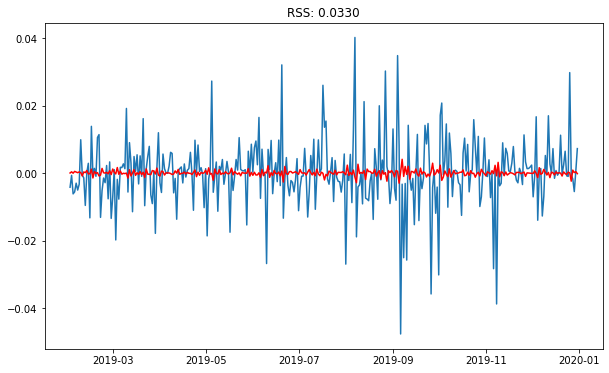

In [27]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(log_mvAV, order=(2,1,0))
results_AR = model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((results_AR.fittedvalues - datasetLogDiffShifting['Open'] ) **2))
print("Plotting AR model")

Plotting MA model


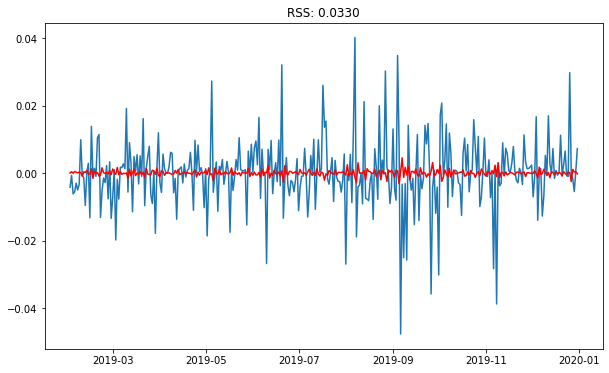

In [28]:
#MA MODEL
model = ARIMA(log_mvAV, order=(0,1,2))
results_MA = model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((results_MA.fittedvalues - datasetLogDiffShifting['Open'] ) **2))
print("Plotting MA model")


Plotting ARIMA model


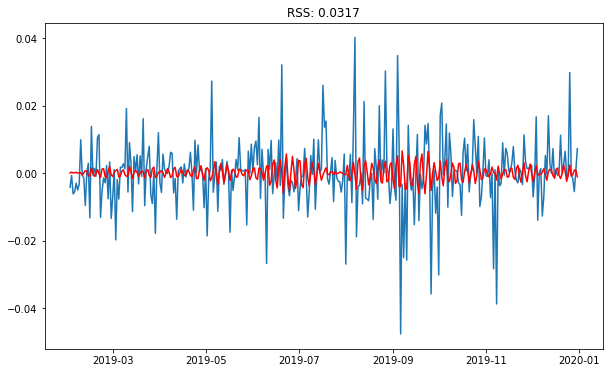

In [29]:
#MA MODEL
model = ARIMA(log_mvAV, order=(2,1,2))
results_ARIMA = model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Open'] ) **2))
print("Plotting ARIMA model")

In [31]:
predictions_arima_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_arima_diff.head()

Date
2019-02-01    0.000060
2019-02-02    0.000296
2019-02-03    0.000077
2019-02-04    0.000173
2019-02-05    0.000265
Freq: D, dtype: float64


In [32]:
# convert to cummulative sum
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff_cumsum.head()

Date
2019-02-01    0.000060
2019-02-02    0.000356
2019-02-03    0.000433
2019-02-04    0.000606
2019-02-05    0.000871
Freq: D, dtype: float64